<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Random Forest
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable `Sale_Price`.
* A diferencia de otras sesiones donde implementábamos el preprocesamiento a mano, ahora haremos uso de los archivos serializados en la sesión pasada.

## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar.
* Para este ejercicio Random Forest de Regresión
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
* Elimine la columna `'Unnamed: 0'` cuando cargue los datos.

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings

> Definimos algunos aspectos de ambiente y valores por defecto de visualización.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el modelo, el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
# Método para escalar datos
from sklearn.preprocessing import StandardScaler
# Método para la selección de datos entre entrenamiento, test y CV
from sklearn.model_selection import train_test_split, GridSearchCV
# Método para reportar las métricas de modelos de clasificación
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
# Método para generar un modelo de regresión con arboles de decisión
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Ejercicio 2: Importación de archivos serializados

* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
* No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas. 
* Para importar un archivo serializado, puede ocupar la siguiente línea de código:

In [5]:
import pickle

In [6]:
# Cargo mi modelo de la sesión anterior
file_in_my = open('pablo-rocco-actividad07.sav', 'rb')
model_tree_my, X_train_my, X_test_my, y_train_my, y_test_my = pickle.load(file_in_my)

In [7]:
# Cargo el modelo de Paulina Ramírez
file_in_pr = open('paulina-ramirez-actividad07.sav', 'rb')
model_tree_pr, X_train_pr, X_test_pr, y_train_pr, y_test_pr = pickle.load(file_in_pr)


#### Mi Modelo:

In [8]:
yhat_my = model_tree_my.predict(X_test_my)
afx.report_scores_regressor(y_test_my, yhat_my)

Error Cuadrático Medio:
1254786559.697

Error Medio Absoluto:
15497.8824

R cuadrado:
0.81


#### Modelo de Paulina Ramírez:

In [9]:
yhat_pr = model_tree_pr.predict(X_test_pr)
afx.report_scores_regressor(y_test_pr, yhat_pr)

Error Cuadrático Medio:
1153615865.1325

Error Medio Absoluto:
15640.3208

R cuadrado:
0.81


> Podemos observar que tanto el modelo de Paulina como el mio andan empatados en relación al $R^2$, no obstante Paulina obtuvo un ECM más bajo que el mio con los respectivos datos de prueba. Por otro lado el EMA de Paulina resulta ser más alto que el mío. Podemos decir que ambos modelos quedan empatados y felicitaciones a Paulina!.

## Ejercicio 3: Evaluación Random Forest

* En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando `sklearn.ensemble.RandomForest` sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
* Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [10]:
model_rf_my = RandomForestRegressor(random_state=14173).fit(X_train_my, y_train_my)

In [11]:
yhat_rf_my = model_rf_my.predict(X_test_my)

In [12]:
afx.report_scores_regressor(y_test_my, yhat_rf_my)

Error Cuadrático Medio:
980161496.6709

Error Medio Absoluto:
13030.0

R cuadrado:
0.85


> Podemos observar que todas las metricas son favorables en este nuevo modelo `model_rf_my`, por sobre los dos modelos de la sesión pasada (el de Paulina y el mio)

> Dado que los atributos relevantes de Paulina no son los mismos que los mios, vamos a revisar como se comporta ese conjunto de atributos con Random Forest.

In [13]:
model_rf_pr = RandomForestRegressor(random_state=14173).fit(X_train_pr, y_train_pr)

In [14]:
yhat_rf_pr = model_rf_pr.predict(X_test_pr)

In [15]:
afx.report_scores_regressor(y_test_pr, yhat_rf_pr)

Error Cuadrático Medio:
877526570.5964

Error Medio Absoluto:
13160.0

R cuadrado:
0.86


> Mis __Felicitaciones a Paulina__, los primeros resultados de la sesión anterior resultaron ser mejores que los mios y esto generó un mejor modelo con el agoritmo de Random Forest. Tanto ECM y $R^2$ son mejores en el nuevo modelo con los atributos relevantes obtenidos por Paulina. 

## Ejercicio 4: Reporte las métricas de desempeño

* Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:
  * `max_features`: None, log2, sqrt.
  * `n_estimators`: Evaluar entre 20 y 1000 en pasos de 50. 
* Guarde la tasa de error en la exactitud medida con OOB.
* Grafique el comportamiento.

In [16]:
# Creamos listas para almacenar las métricas  MSE, MAE, R2 y OOB
tmp_test_mse_none, tmp_test_mse_log2, tmp_test_mse_sqrt = [], [], []
tmp_test_mae_none, tmp_test_mae_log2, tmp_test_mae_sqrt = [], [], []
tmp_test_r2_none, tmp_test_r2_log2, tmp_test_r2_sqrt = [], [], []
tmp_oob_none,tmp_oob_log2, tmp_oob_sqrt = [], [], []
# Creamos un rango para evaluar entre 20 y 1000 estimadores en pasos de 50. 
n_estimators = range(20, 1000, 50)

min_error = 1
for nest in n_estimators:
    #max_features none
    model_rf_none = RandomForestRegressor(max_features=None, 
                                          n_estimators=nest, 
                                          oob_score=True, 
                                          random_state=14173).fit(X_train_my, y_train_my)
    #max_features log2
    model_rf_log2 = RandomForestRegressor(max_features="log2", 
                                          n_estimators=nest, 
                                          oob_score=True, 
                                          random_state=14173).fit(X_train_my, y_train_my)
    #max_features sqrt
    model_rf_sqrt = RandomForestRegressor(max_features="sqrt", 
                                          n_estimators=nest, 
                                          oob_score=True, 
                                          random_state=14173).fit(X_train_my, y_train_my)
    # Estimamos el error en OOB
    tmp_oob_none.append(1 - model_rf_none.oob_score_)
    tmp_oob_sqrt.append(1 - model_rf_log2.oob_score_)
    tmp_oob_log2.append(1 - model_rf_sqrt.oob_score_)
    
    if (1 - model_rf_none.oob_score_) < min_error:
        min_error = 1 - model_rf_none.oob_score_
        model_best = model_rf_none
    if (1 - model_rf_log2.oob_score_) < min_error:
        min_error = 1 - model_rf_log2.oob_score_
        model_best = model_rf_log2
    if (1 - model_rf_sqrt.oob_score_) < min_error:
        min_error = 1 - model_rf_sqrt.oob_score_
        model_best = model_rf_sqrt
    
     # Estimamos el error en r2
    tmp_test_r2_none.append(r2_score(y_test_my, model_rf_none.predict(X_test_my)))
    tmp_test_r2_log2.append(r2_score(y_test_my, model_rf_log2.predict(X_test_my)))
    tmp_test_r2_sqrt.append(r2_score(y_test_my, model_rf_sqrt.predict(X_test_my)))

<Figure size 864x288 with 0 Axes>

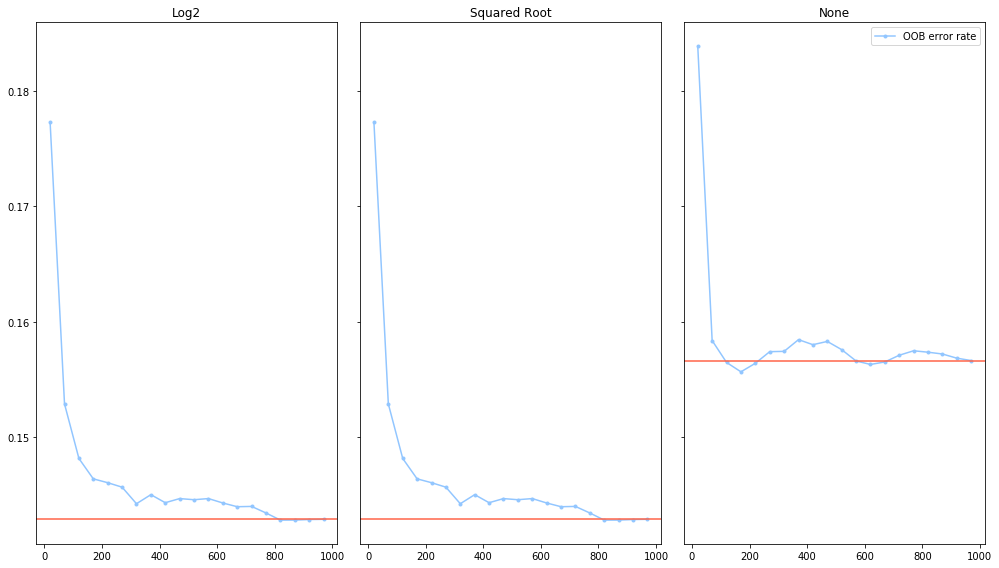

In [17]:
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(n_estimators, tmp_oob_log2, '.-', label='OOB error rate');
axs[0].set_title('Log2');
axs[0].axhline(1 - model_rf_log2.oob_score_, color='tomato')
axs[1].plot(n_estimators, tmp_oob_sqrt,'.-',  label='OOB error rate');
axs[1].set_title('Squared Root');
axs[1].axhline(1 - model_rf_sqrt.oob_score_, color='tomato')
axs[2].plot(n_estimators, tmp_oob_none, '.-', label='OOB error rate');
axs[2].set_title('None');
axs[2].axhline(1 - model_rf_none.oob_score_, color='tomato')
plt.tight_layout();
plt.legend();

> Podemos observar que OOB son casi idénticos para el caso de aleatorizar los atributos tanto con la norma Log2 y squared Root. Por otro lado, el no aleatorizar los atributos tiene un desempeño bastante más bajo que si aplicar una aleatorización. Respecto a la cantidad de estimadores, el puntaje de OOB tiende a mejorar a medida que se aumenta la cantidad de estimadores incluidos en el ensamble.

<Figure size 864x288 with 0 Axes>

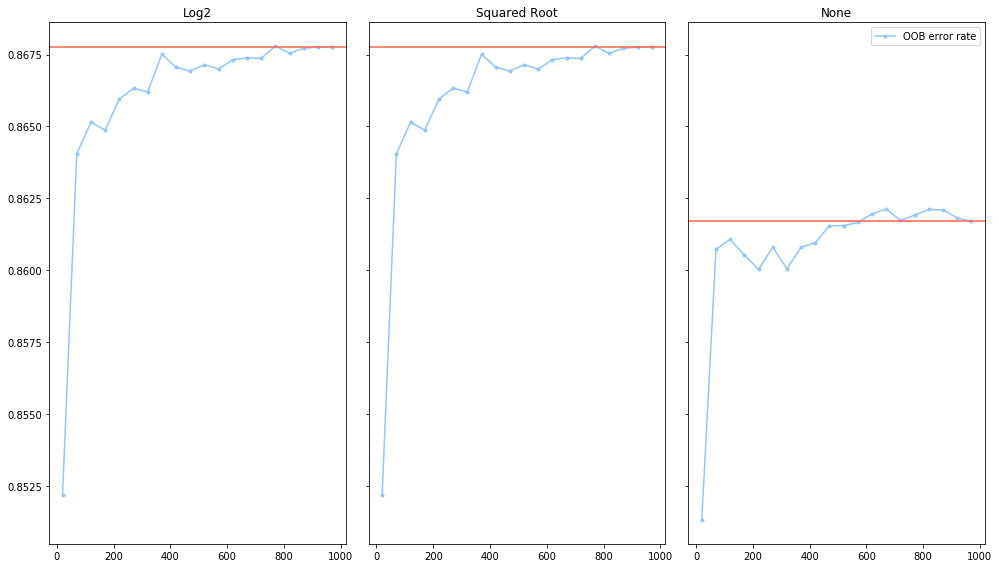

In [18]:
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(n_estimators, tmp_test_r2_log2, '.-', label='OOB error rate');
axs[0].set_title('Log2');
axs[0].axhline(r2_score(y_test_my, model_rf_log2.predict(X_test_my)), color='tomato')

axs[1].plot(n_estimators, tmp_test_r2_sqrt,'.-',  label='OOB error rate');
axs[1].set_title('Squared Root');
axs[1].axhline(r2_score(y_test_my, model_rf_sqrt.predict(X_test_my)), color='tomato')

axs[2].plot(n_estimators, tmp_test_r2_none, '.-', label='OOB error rate');
axs[2].set_title('None');
axs[2].axhline(r2_score(y_test_my, model_rf_none.predict(X_test_my)), color='tomato')
plt.tight_layout();
plt.legend();

> Revisando el $R^2$ se observa al igual que las metricas de error, que es muy similar tanto para la aleatorización de atributos con norma log2 y sqrt, por el contrario, para el caso de no aleatorizar atributos tenemos un $R^2$ un poco más bajo. Independiente a las normas de aleatorización de atributos, el valor del coeficiente de determinación se mantien sobre el 85%, lo cual es bastante aceptable.

## Ejercicio 5: Refactorice el modelo

* En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.

In [19]:
model_best.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=820,
                      n_jobs=None, oob_score=True, random_state=14173,
                      verbose=0, warm_start=False)>

> La mejor combinación de parámetros es cuando tenemos __820__ estimadores y usamos la norma __log2__. Para efectos de completar lo solicitado en el ejercicio, vamos a reentrear el modelo.

In [20]:
model_best.fit(X_train_my, y_train_my)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=820,
                      n_jobs=None, oob_score=True, random_state=14173,
                      verbose=0, warm_start=False)

In [21]:
yhat_rf_best_my = model_best.predict(X_test_my)

In [22]:
afx.report_scores_regressor(y_test_my, yhat_rf_best_my)

Error Cuadrático Medio:
867955765.8135

Error Medio Absoluto:
11973.1244

R cuadrado:
0.87


> Tenemos el mejor modelo entre los modelos trabajados en la sesión anterior y la de ahora. Logramos reducir el MSE de __1.316.619.934__ a __867.955.765__, es casi un 35% de mejora. Por otro lado el $R^2$ se logró mejorar sobre el __0.8__ inicial, llegando a __0.87__.
>
>Definitivamente este tipo de algoritmo es uno de los mejores vistos hasta este momento.